In [95]:
import pandas as pd
import numpy as np  
df=pd.read_csv('Retail_Transactions_2000.csv')
df.head(20)

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123
5,T00006,C3286,Male,63,Delhi,Furniture,2,2758,2023-05-23,Card,5516
6,T00007,C2679,Other,30,Pune,Electronics,5,781,2023-10-22,Card,3905
7,T00008,C9935,Female,35,Hyderabad,Books,5,4599,2023-11-12,Cash,22995
8,T00009,C2424,Female,41,Jaipur,Books,5,2263,2023-06-10,Cash,11315
9,T00010,C7912,Male,70,Lucknow,Groceries,1,1194,2023-02-20,UPI,1194


In [96]:
df.size

22000

In [97]:
df.shape

(2000, 11)

In [98]:
df.columns

Index(['TransactionID', 'CustomerID', 'Gender', 'Age', 'City',
       'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode',
       'TotalAmount'],
      dtype='object')

In [99]:
b=df.info()
print(b)
a=df.describe()
a


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB
None


,Age,Quantity,Price,TotalAmount
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,44.679000,2.957000,2496.61000,7307.414500
std,15.179795,1.412143,1413.95187,5705.065758
min,18.000000,1.000000,100.00000,111.000000
25%,32.000000,2.000000,1239.00000,2756.250000
50%,45.000000,3.000000,2481.50000,5562.500000
75%,58.000000,4.000000,3695.50000,10751.250000
max,70.000000,5.000000,5000.00000,24950.000000


In [100]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [101]:
df.duplicated().sum()

np.int64(0)

Data cleaning

In [102]:
c=(df['Price']<0).sum()
print(c)
d=(df['Quantity']<0).sum()
print(d)

0
0


Feature engineering

In [103]:
df['TotalAmount'].isnull().sum()

np.int64(0)

In [104]:
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"], errors="coerce")
year = (df["PurchaseDate"].dt.year).value_counts()
print(year)

PurchaseDate
2023    1994
2024       6
Name: count, dtype: int64


In [105]:
df['month']=(df['PurchaseDate'].dt.month)
month=(df['month'].value_counts()).sort_index()
print(month)
df

month
1     155
2     142
3     170
4     179
5     172
6     180
7     172
8     192
9     162
10    157
11    167
12    152
Name: count, dtype: int64


,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,month
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,3
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,1
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,4
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,8
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872,1
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232,1
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246,6
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418,1


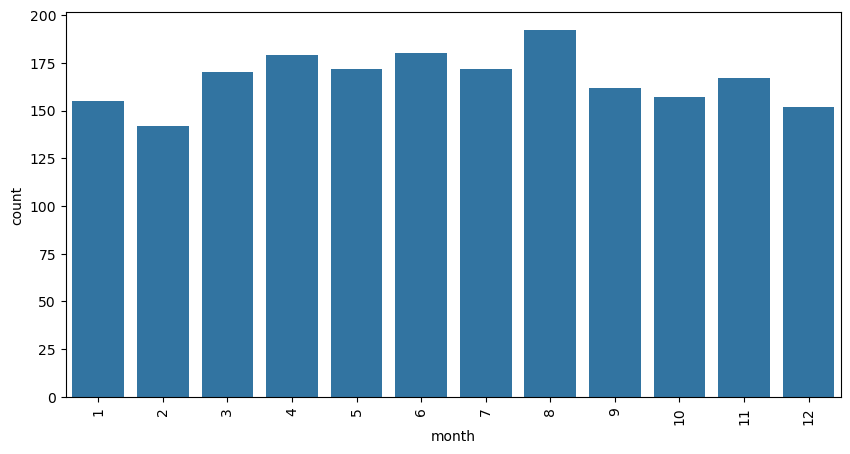

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,5))
sns.countplot(x='month',data=df)
plt.xticks(rotation=90)
plt.show()

In [107]:
bins = [0, 18, 25, 40, 60, float("inf")]
labels = ["0-18", "18-25", "26-40", "41-60", "60+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

df["AgeGroup"].value_counts().sort_index().sum()


np.int64(2000)

Encoding and Transformation

In [123]:

df['Gender_encoded']=df['Gender'].map({'Male':0,'Female':1,'Other':2})
z=df['Gender_encoded'].value_counts()
print(z)
print(z.sum())


Gender_encoded
0    673
1    664
2    663
Name: count, dtype: int64
2000


In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[["Age_normalised","Price_normalised","Amount_normalised"]] = scaler.fit_transform(df[["Age","Price","TotalAmount"]])
df[["Age_normalised","Price_normalised","Amount_normalised"]].head()


,Age_normalised,Price_normalised,Amount_normalised
0,0.288462,0.893673,0.536495
1,0.038462,0.194082,0.207094
2,0.557692,0.002245,0.000000
3,0.057692,0.580816,0.588550
4,0.442308,0.616939,0.121261


In [110]:
df.isnull().sum()

TransactionID        0
CustomerID           0
Gender               0
Age                  0
City                 0
ProductCategory      0
Quantity             0
Price                0
PurchaseDate         0
PaymentMode          0
TotalAmount          0
month                0
AgeGroup             0
Gender_encoded       0
Age_normalised       0
Price_normalised     0
Amount_normalised    0
dtype: int64

In [112]:
df

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,month,AgeGroup,Gender_encoded,Age_normalised,Price_normalised,Amount_normalised
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,3,26-40,1,0.288462,0.893673,0.536495
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,1,18-25,2,0.038462,0.194082,0.207094
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,4,41-60,2,0.557692,0.002245,0.000000
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,8,18-25,2,0.057692,0.580816,0.588550
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,9,41-60,1,0.442308,0.616939,0.121261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872,1,41-60,0,0.500000,0.476735,0.191674
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232,1,41-60,0,0.673077,0.539592,0.326946
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246,6,41-60,0,0.519231,0.642041,0.126213
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418,1,41-60,0,0.480769,0.532449,0.213656


In [111]:
df.to_csv('Retail_Cleaned.csv', index=False)

Part B:Data visualisation

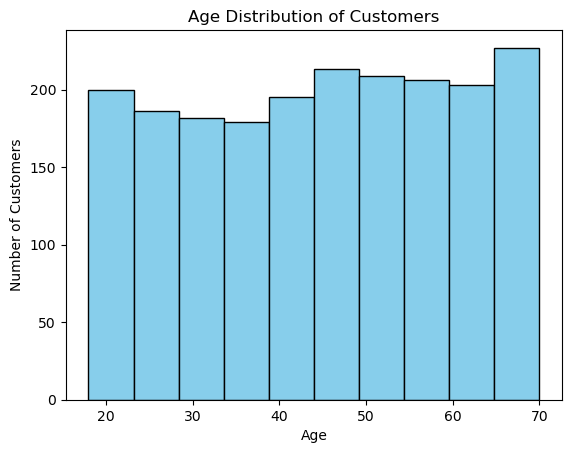

In [118]:
plt.hist(df["Age"], bins=10, edgecolor="black", color="skyblue")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age Distribution of Customers")
plt.show()


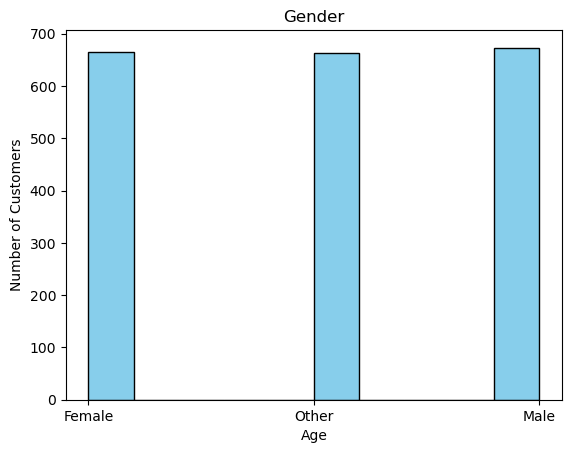

In [119]:
plt.hist(df["Gender"], edgecolor="black", color="skyblue")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Gender")
plt.show()


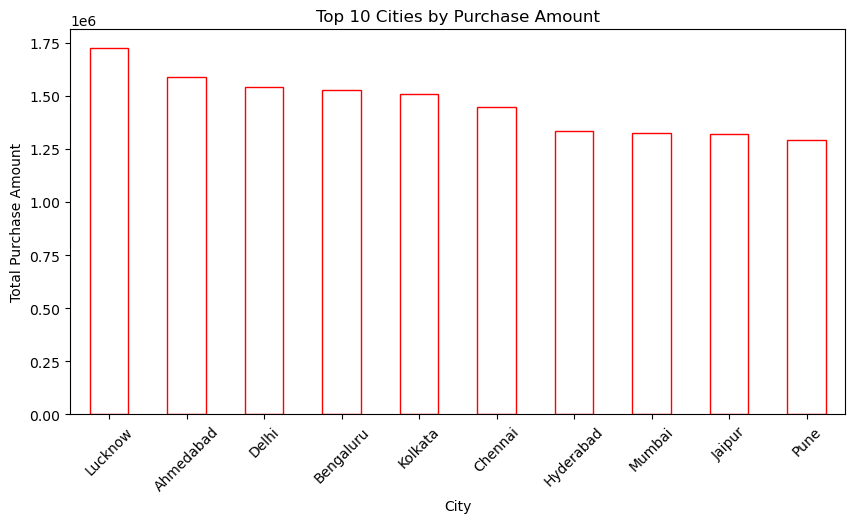

In [136]:
top_cities_amount = (df.groupby("City")["TotalAmount"].sum().sort_values(ascending=False))

top_cities_amount.plot(kind="bar", color="white", edgecolor="red", figsize=(10,5))

plt.xlabel("City")
plt.ylabel("Total Purchase Amount")
plt.title("Top 10 Cities by Purchase Amount")
plt.xticks(rotation=45)
plt.show()


Sales insight

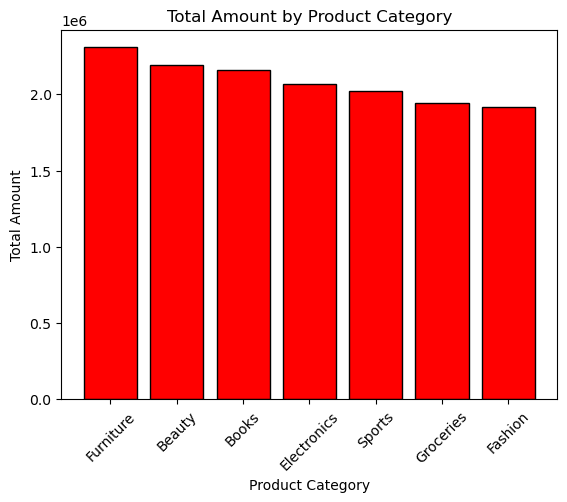

In [154]:
import matplotlib.pyplot as plt

category_amount = df.groupby("ProductCategory")["TotalAmount"].sum().sort_values(ascending=False)

plt.bar(category_amount.index, category_amount.values, color='red', edgecolor='black')
plt.xlabel('Product Category')
plt.ylabel('Total Amount') 
plt.title('Total Amount by Product Category')
plt.xticks(rotation=45)
plt.show()


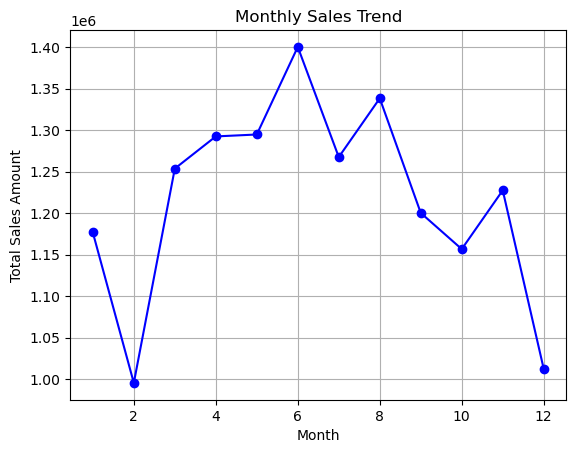

In [151]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby("month")["TotalAmount"].sum().sort_index()

plt.plot(monthly_sales.index, monthly_sales.values, marker="o", color="blue")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.title("Monthly Sales Trend")
plt.grid()
plt.show()


PaymentMode
Card      520
Wallet    519
UPI       484
Cash      477
Name: count, dtype: int64


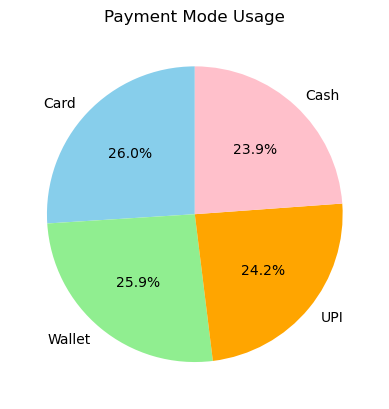

In [153]:

payment_usage = df["PaymentMode"].value_counts()
print(payment_usage)
plt.pie(payment_usage.values, labels=payment_usage.index, autopct="%1.1f%%", startangle=90, colors=["skyblue","lightgreen","orange","pink"])
plt.title("Payment Mode Usage")
plt.show()


C:\Users\Navaneetha Krishnan\AppData\Local\Temp\ipykernel_20712\3544560208.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_age = df.groupby("AgeGroup")["TotalAmount"].mean().sort_index()


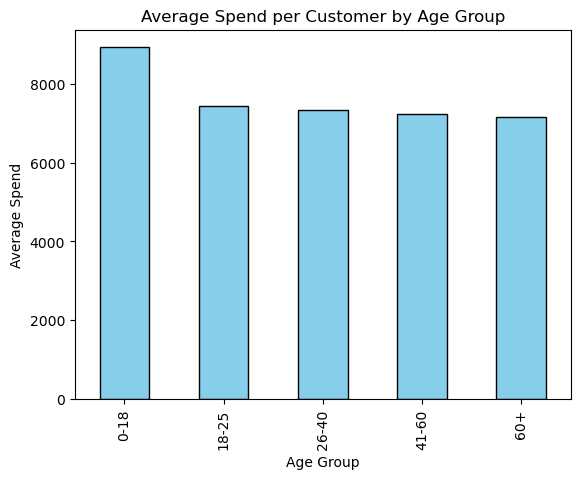

In [158]:

avg_spend_age = df.groupby("AgeGroup")["TotalAmount"].mean().sort_index()

avg_spend_age.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Age Group")
plt.ylabel("Average Spend")
plt.title("Average Spend per Customer by Age Group")
plt.show()


C:\Users\Navaneetha Krishnan\AppData\Local\Temp\ipykernel_20712\1703207773.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='TotalAmount', data=df, palette="Set3")


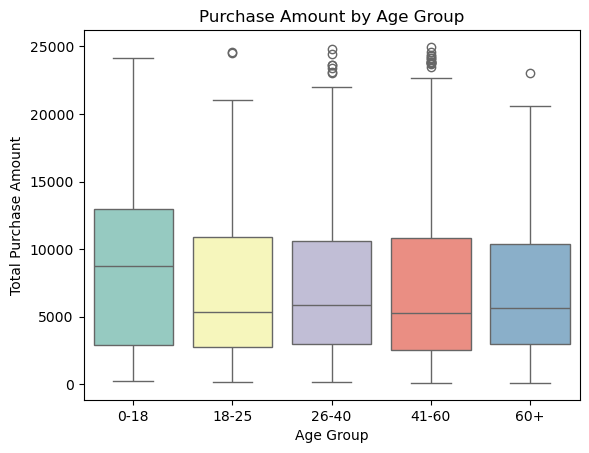

In [155]:
sns.boxplot(x='AgeGroup', y='TotalAmount', data=df, palette="Set3")
plt.xlabel("Age Group")
plt.ylabel("Total Purchase Amount")
plt.title("Purchase Amount by Age Group")
plt.show()